In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("/content/winequality-red.csv",delimiter=';', nrows=200)
# Функция для замены значений
def replace_quality(value):
    if value < 6:
        return 0
    else:
        return 1

# Применяем функцию к колонке "качество"
df['quality'] = df['quality'].apply(replace_quality)
labels = df["quality"]
df = df.drop("quality", axis=1)
print(df, labels)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0              7.4             0.700         0.00             1.9      0.076   
1              7.8             0.880         0.00             2.6      0.098   
2              7.8             0.760         0.04             2.3      0.092   
3             11.2             0.280         0.56             1.9      0.075   
4              7.4             0.700         0.00             1.9      0.076   
..             ...               ...          ...             ...        ...   
195            7.8             0.590         0.33             2.0      0.074   
196            7.3             0.580         0.30             2.4      0.074   
197           11.5             0.300         0.60             2.0      0.067   
198            5.4             0.835         0.08             1.2      0.046   
199            6.9             1.090         0.06             2.1      0.061   

     free sulfur dioxide  total sulfur 

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.15         0.43   
volatile acidity              -0.15              1.00        -0.51   
citric acid                    0.43             -0.51         1.00   
residual sugar                 0.01             -0.05         0.09   
chlorides                      0.17             -0.02         0.39   
free sulfur dioxide            0.11             -0.12         0.26   
total sulfur dioxide           0.07             -0.10         0.33   
density                        0.66             -0.13         0.40   
pH                            -0.66              0.14        -0.37   
sulphates                      0.26             -0.16         0.37   
alcohol                       -0.36              0.02        -0.15   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity                   0.01       0.17                 0.11   
volatile acidit

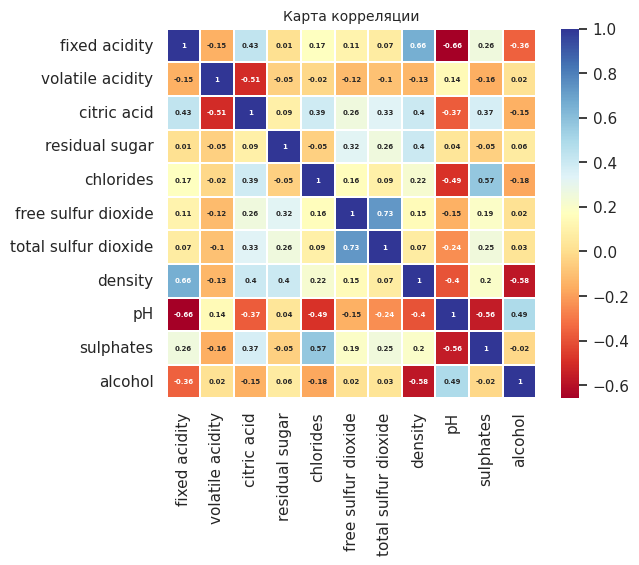

In [ ]:
var_corr = round(df.corr(numeric_only=True),2)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=10)
plt.show()
# plt.colormaps() -  так можно посмотреть доступные цветовые карты

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test, labels_train, labels_test = train_test_split(df, labels, test_size=0.2, random_state = 0)

print(df.shape)
print(df_train.shape)
print(df_test.shape)

(200, 11)
(160, 11)
(40, 11)


# Наивный гауссовский классификатор

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
model = clf.fit(df_train, labels_train)
print(clf.predict(df_test[2:3]))

[1]


In [ ]:
new_observation = [np.random.uniform(0, 2, 11)]
print(new_observation)
model.predict(new_observation)

[array([1.61404567, 1.28004831, 0.7362048 , 0.62550659, 1.6036723 ,
       0.14089437, 1.36714592, 0.76145849, 1.26786191, 1.85375818,
       1.70788024])]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(df_test, labels_test)))

Правильность на тестовом наборе: 0.57


In [ ]:
from sklearn.naive_bayes import BernoulliNB
# Создать три бинарных признака
features = np.random.randint(2, size=(11, 3))
# Создать вектор бинарных целей
target = np.random.randint(2, size=(11, 1)).ravel()
# Создать объект бернуллиева наивного Байеса с априорными вероятностями каждого класса
clf = BernoulliNB(class_prior=[0.5, 0.25])
# Натренировать модель
model = clf.fit(features, target)

In [ ]:
new_observation = [[0, 0, 1]]
model.predict(new_observation)

array([1])

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(clf.score(features, target)))

Правильность на тестовом наборе: 0.73


# K-ближайших соседей

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
knn.fit(df_train, labels_train)

In [ ]:
X_new = np.array([np.random.uniform(0, 10, 11)])
print("форма массива X_new: {}".format(X_new.shape))
#Делаем прогноз
prediction = knn.predict(X_new)
print("Прогноз: {}".format(prediction))

форма массива X_new: (1, 11)
Прогноз: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(knn.score(df_test, labels_test)))

Правильность на тестовом наборе: 0.70


# Метод опорных векторов

In [ ]:
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [ ]:
print( df_train)
features = df_train.iloc[:,1:3]
features.iloc[:,1]
print(features)

     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
134            7.9             1.040         0.05             2.2      0.084   
66             7.5             0.520         0.11             1.5      0.079   
26             7.6             0.410         0.24             1.8      0.080   
113           10.1             0.310         0.44             2.3      0.080   
168            6.8             0.630         0.07             2.1      0.089   
..             ...               ...          ...             ...        ...   
67             6.6             0.705         0.07             1.6      0.076   
192            6.8             0.630         0.12             3.8      0.099   
117            7.8             0.560         0.12             2.0      0.082   
47             8.7             0.290         0.52             1.6      0.113   
172            8.0             0.420         0.17             2.0      0.073   

     free sulfur dioxide  total sulfur 

In [ ]:
# Создать опорно-векторный классификатор
svc = LinearSVC(C=1.0)
model = svc.fit(df_train, labels_train)
features = df_train.iloc[:,1:3]
features.iloc[:,1]

/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


134    0.05
66     0.11
26     0.24
113    0.44
168    0.07
       ... 
67     0.07
192    0.12
117    0.12
47     0.52
172    0.17
Name: citric acid, Length: 160, dtype: float64

In [ ]:
import seaborn as sns
sns.set()

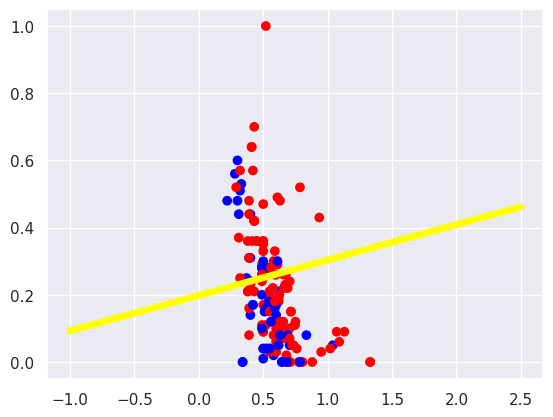

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
# Вывести точки данных на график и расцветить, используя их класс
color = ["blue" if C == 1 else "red" for C in labels_train]
plt.scatter(features.iloc[:,0], features.iloc[:,1], c=color)
# Создать гиперплоскость
w = svc.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(-1, 2.5)
yy = a * xx-(svc.intercept_[0]) / w[1] + 0.5
# Начертить гиперплоскость
plt.plot(xx, yy, c="yellow", linewidth=5)
plt.show()

In [ ]:
print("Правильность на тестовом наборе: {:.2f}".format(model.score(df_test, labels_test)))

Правильность на тестовом наборе: 0.17


In [ ]:
from sklearn.svm import SVC
# Задать начальное значение рандомизации
np.random.seed(0)
# Сгенерировать два признака
features = np.random.randn(df_train.shape[0], 2)
# Cгенерируем линейно разделимые классы
target_xor = np.logical_xor(features[:,0] > 0, features[:,1] > 0)
target = np.where(target_xor, 0, 1)
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор
model = svc.fit(features, target)

In [ ]:
# Выведем на график наблюдения и гиперплоскость границы решения
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier):
    cmap = ListedColormap(("red", "blue"))
    xx1, xx2 = np.meshgrid(np.arange(-3, 3, 0.02), np.arange(-3, 3, 0.02))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.1, cmap=cmap)
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)

<ipython-input-231-a607ed51c873>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)


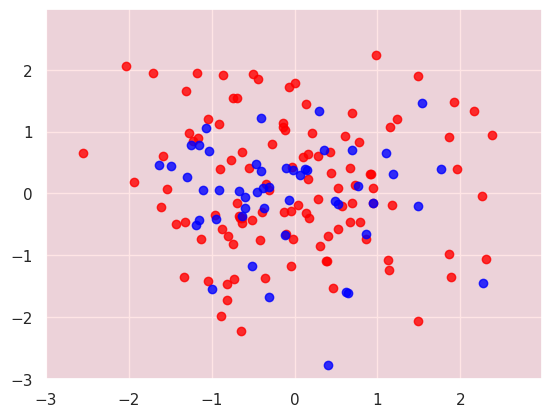

In [ ]:
# Создать опорно-векторный классификатор с линейным ядром
svc_linear = SVC(kernel="linear", random_state=0, C=1)
# Натренируем модель
svc_linear.fit(features, labels_train)
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear', max_iter=-1, probability=False, random_state=0, shrinking=True,
tol=0.001, verbose=False)

plot_decision_regions(features, labels_train, classifier=svc_linear)
plt.show()

<ipython-input-231-a607ed51c873>:11: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1], alpha=0.8, c=cmap(idx), label=cl)


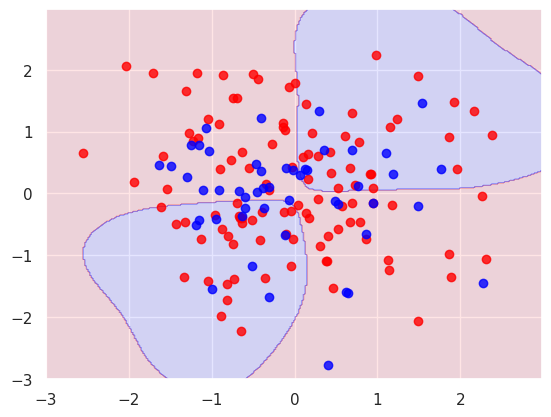

In [ ]:
# Создать опорно-векторную машину с радиально-базисным функциональным ядром (RBF-ядром)
svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)
# Натренировать классификатор
model = svc.fit(features, target)

# Вывести на график наблюдения и гиперплоскость
plot_decision_regions(features, labels_train, classifier=svc)
plt.show ()

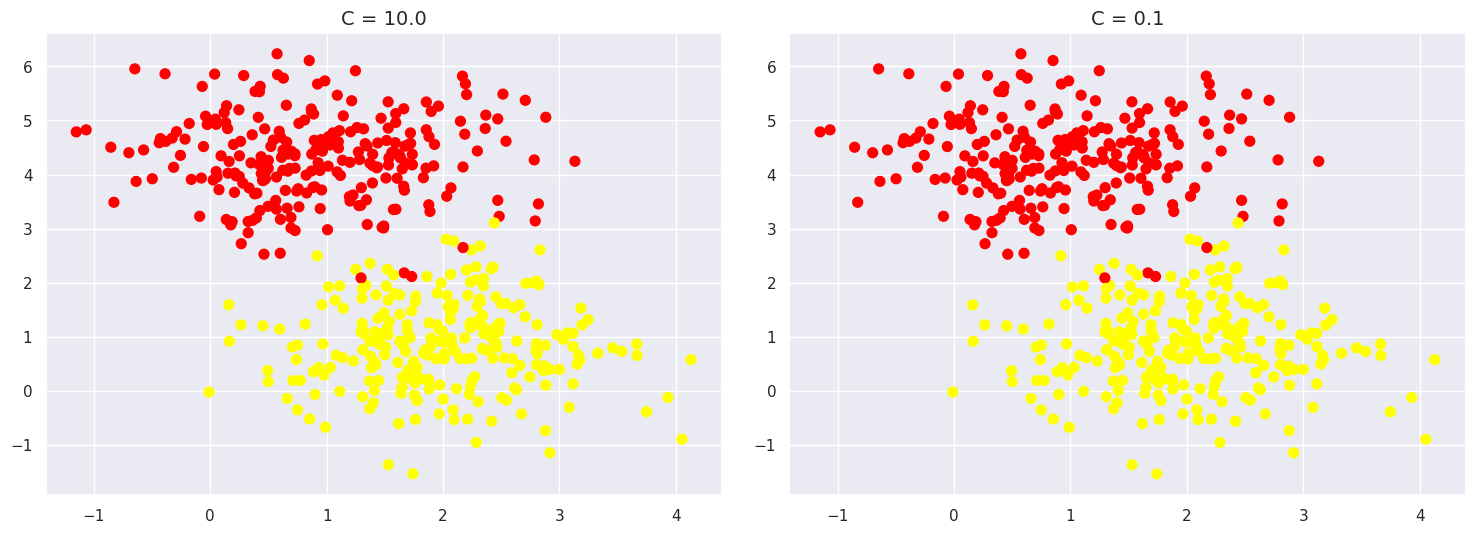

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, centers=2, random_state=0, cluster_std=0.8)
fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    axi.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300, lw=1, facecolors='none')
    axi.set_title('C = {0:.1f}'.format(C), size=14)

# Деревья решений и случайные леса

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier().fit(df_train, labels_train)

In [ ]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
 ax = ax or plt.gca()
 # Рисуем обучающие точки
 ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap, clim=(y.min(), y.max()), zorder=3)
 ax.axis('tight')
 ax.axis('off')
 xlim = ax.get_xlim()
 ylim = ax.get_ylim()
 # Обучаем оцениватель
 model.fit(X, y)
 xx, yy = np.meshgrid(np.linspace(*xlim, num=200), np.linspace(*ylim, num=200))
 Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
 # Создаем цветной график с результатами
 n_classes = len(np.unique(y))
 contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)
 ax.set(xlim=xlim, ylim=ylim)

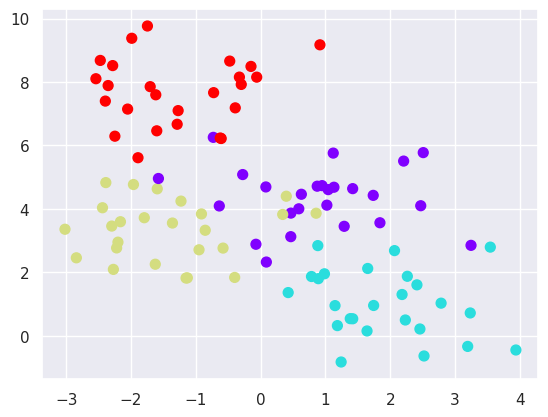

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=100, centers=4, random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')

<ipython-input-197-a1e3a39eef48>:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


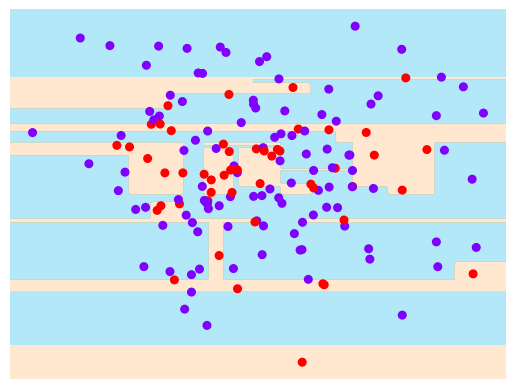

In [ ]:
visualize_classifier(DecisionTreeClassifier(), features, labels_train)

<ipython-input-197-a1e3a39eef48>:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


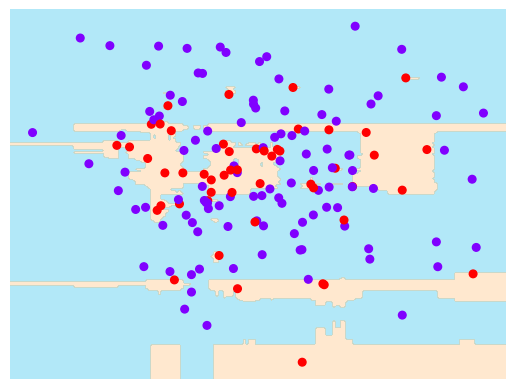

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
tree = DecisionTreeClassifier()
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1)
bag.fit(X, y)
visualize_classifier(bag, features, labels_train)

Случайные леса

<ipython-input-197-a1e3a39eef48>:15: UserWarning: The following kwargs were not used by contour: 'clim'
  contours = ax.contourf(xx, yy, Z, alpha=0.3, levels=np.arange(n_classes + 1) - 0.5, cmap=cmap, clim=(y.min(), y.max()), zorder=1)


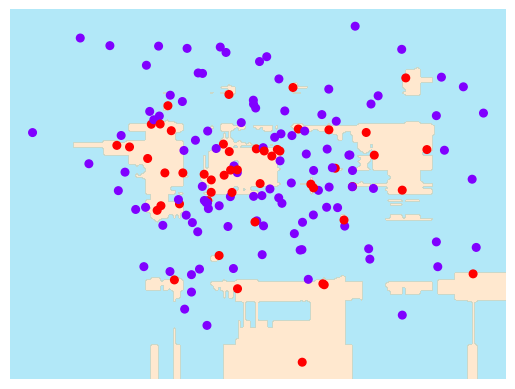

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=0)
visualize_classifier(model, features, labels_train)

# Новый раздел

In [ ]:
print(np.shape(df))

In [ ]:
for k, v in df.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    irq = q3 - q1
    v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f%%" % (k, perc))

In [ ]:
fig, axs = plt.subplots(ncols=6, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for k,v in df.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
var_corr = round(df.corr(numeric_only=True),2)
print(var_corr)
mask = np.zeros_like(var_corr)
sns.heatmap(var_corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("RdYlBu")
                , linewidths=.1)
plt.title('Карта корреляции', fontsize=10)
plt.show()
# plt.colormaps() -  так можно посмотреть доступные цветовые карты